In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio

In [2]:
df=pd.read_csv("Electric Car Data.csv")
df.head()

Brand                          Model  Accelsec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0       460              70.0              161             940         Yes   
1       270              45.0              167             250         Yes   
2       400              75.0              181             620         Yes   
3       360              74.0              206             560         Yes   
4       170              28.5              168             190         Yes   

  PowerTrain   Plug Type Body Style Segment  Seats  Price Euro          INR  
0        AWD  Type 2 CCS      Sedan       D      5       55480  4540988.068  
1        RWD  Type 2 CCS  Hatchback       C      5       30000  2455473.000  
2        AWD  Type 2 CCS   Liftback       D      5       56440  4619563.204  
3        RWD  Type 2 CCS        SUV       D      5       68040  5569012.764  
4        RWD  Type 2 CCS  Hatchback       B      4       32997  2700774.753

# Descriptive Statistics of Dataset

In [3]:
df.describe()

Accelsec  TopSpeed_KmH    Range_Km  Battery_Pack Kwh  \
count  102.000000    102.000000  102.000000        102.000000   
mean     7.391176    179.313725  338.627451         65.415686   
std      3.031913     43.771228  126.700623         29.955782   
min      2.100000    123.000000   95.000000         16.700000   
25%      5.100000    150.000000  250.000000         43.125000   
50%      7.300000    160.000000  340.000000         64.350000   
75%      9.000000    200.000000  400.000000         83.700000   
max     22.400000    410.000000  970.000000        200.000000   

       Efficiency_WhKm  FastCharge_KmH       Seats     Price Euro  \
count       102.000000      102.000000  102.000000     102.000000   
mean        189.303922      435.686275    4.882353   55997.588235   
std          29.679072      220.447384    0.799680   34250.724403   
min         104.000000        0.000000    2.000000   20129.000000   
25%         168.000000      260.000000    5.000000   34414.750000   
50%         180.500000      440.000000    5.000000   45000.000000   
75%         204.500000      557.500000    5.000000   65000.000000   
max         273.000000      940.000000    7.000000  215000.000000   

                INR  
count  1.020000e+02  
mean   4.583352e+06  
std    2.803391e+06  
min    1.647541e+06  
25%    2.816816e+06  
50%    3.683210e+06  
75%    5.320192e+06  
max    1.759756e+07

# Information of type of data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   Accelsec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  Plug Type         102 non-null    object 
 11  Body Style        102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  Price Euro        102 non-null    int64  
 15  INR               102 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory us

In [5]:
df.shape

(102, 16)

# Finding out the number of null values

In [6]:
df.isnull().sum()

Brand               0
Model               0
Accelsec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
Plug Type           0
Body Style          0
Segment             0
Seats               0
Price Euro          0
INR                 0
dtype: int64

In [7]:
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'Plug Type',
       'Body Style', 'Segment'],
      dtype='object')

# Correlation matrix for numerical features

C:\Users\rutuj\AppData\Local\Temp\ipykernel_30004\2939338540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


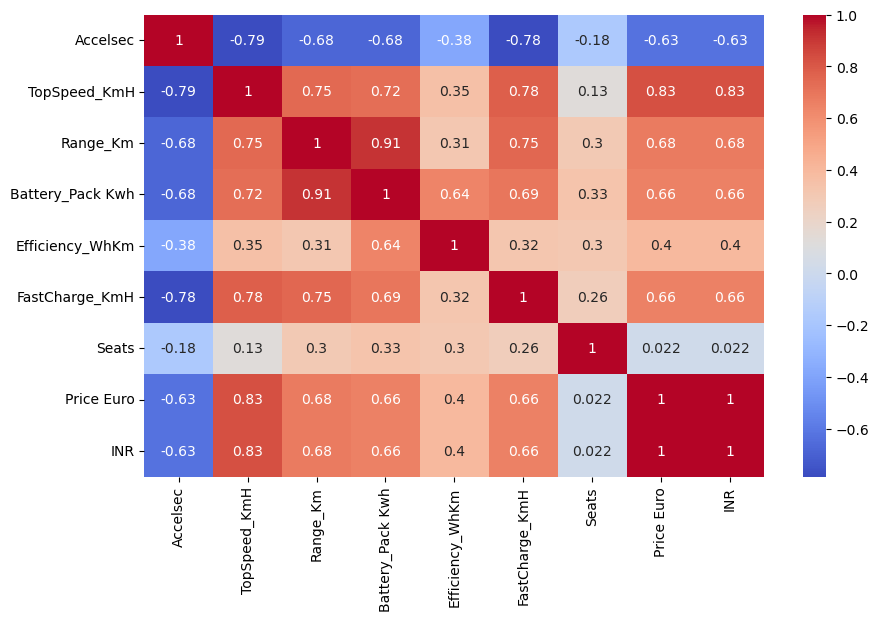

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [9]:
fig=px.bar(df,x='Accelsec',y='Brand',color='Brand',title="Which car has highest acceleration?",
          labels={'x':'Acceleration','y':'Car Brands'})
pio.show(fig)

In [10]:
fig1=px.bar(df,x='Brand',y="TopSpeed_KmH",color='Brand',title="Which car has Top Speed?",
            labels={'x':'Car Brands','y':'TopSpeed_KmH'})
pio.show(fig1)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

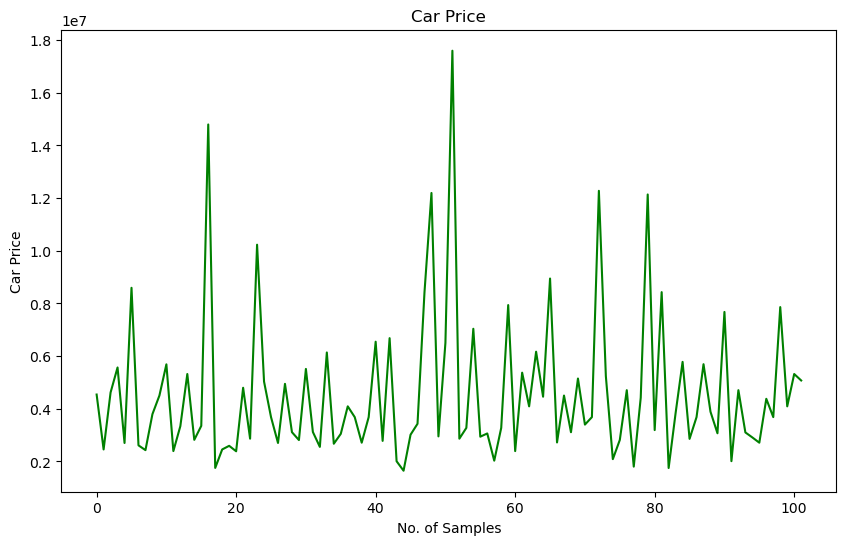

In [11]:
df['INR'].plot(figsize=(10,6),title="Car Price",xlabel='No. of Samples',ylabel='Car Price',color='green')

In [12]:
fig2=px.pie(df,names='Brand',values='INR')
pio.show(fig2)

In [13]:
fig3=px.pie(df,names='Brand',values='FastCharge_KmH')
pio.show(fig3)

In [14]:
fig4 = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')

In [15]:
fig5 = px.scatter_3d(df,x = 'Brand',y = 'Accelsec',z = 'INR',color = 'Brand')

In [16]:
fig6 = px.box(df,x='RapidCharge',y = 'INR',color = 'RapidCharge',points='all')
pio.show(fig6)

# Pairplot

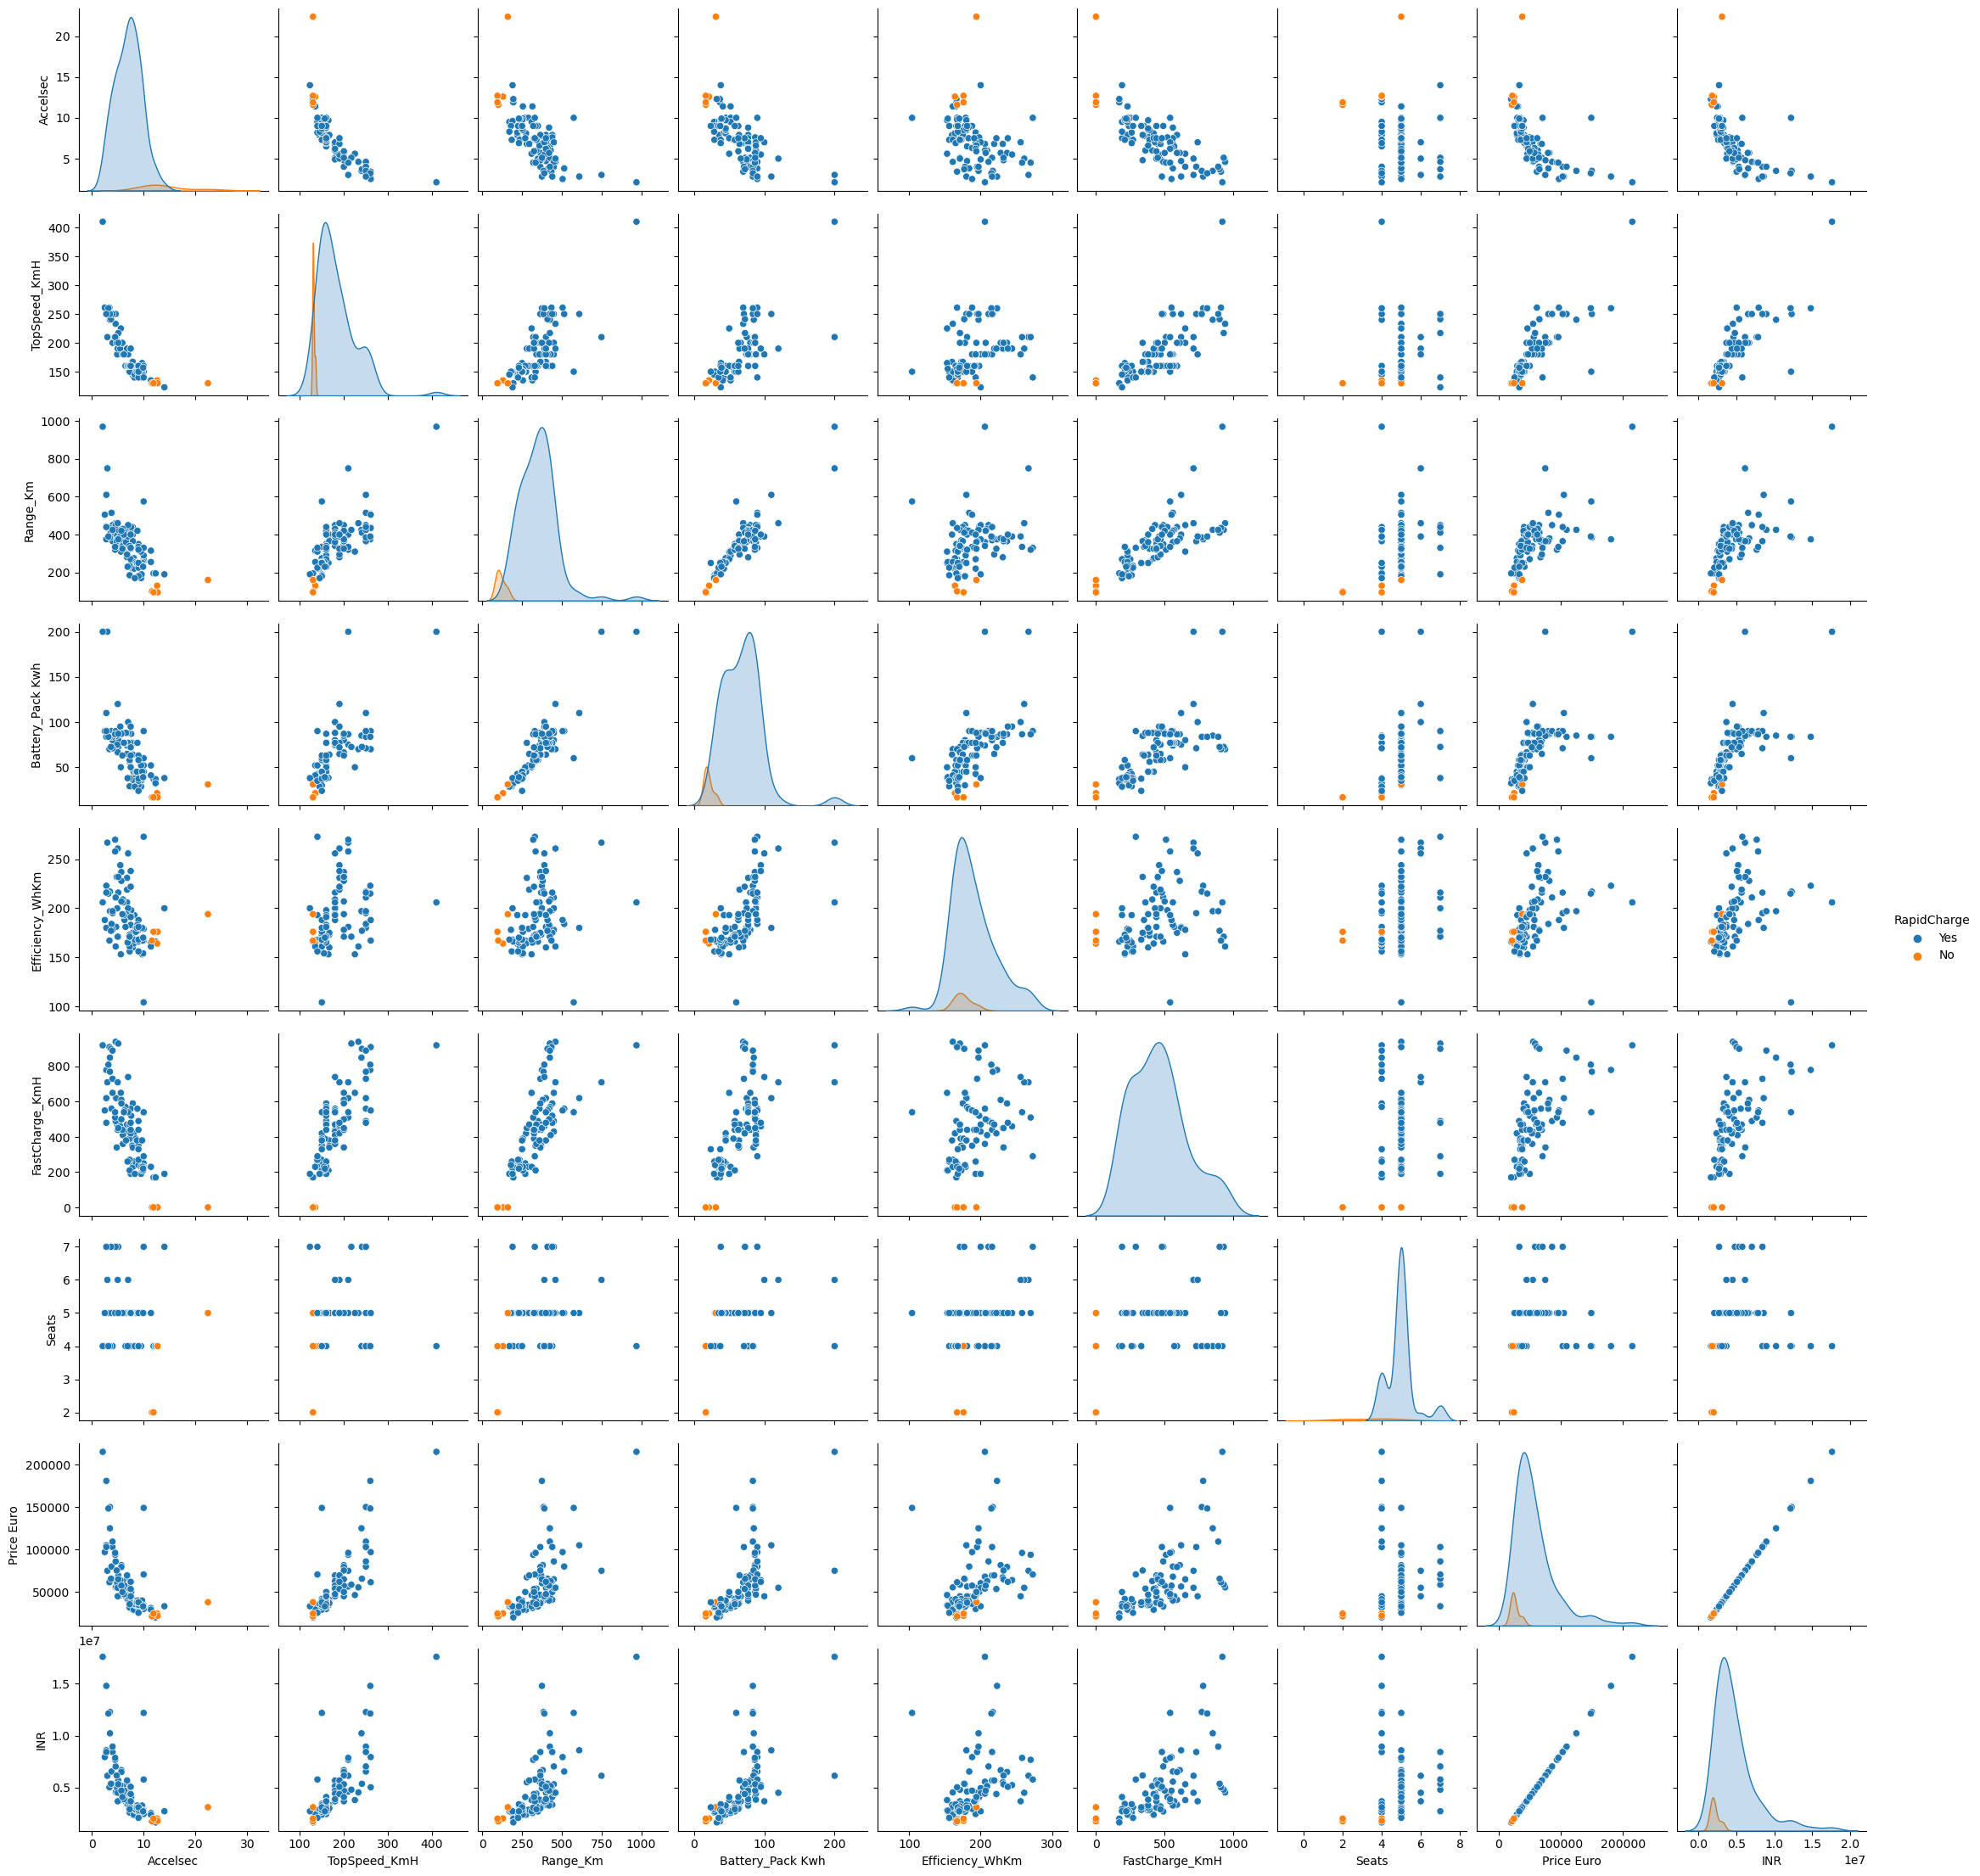

In [17]:
sns.pairplot(df,hue='RapidCharge')

In [18]:
a=np.arange(1,103)

# Top speeds achieved by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

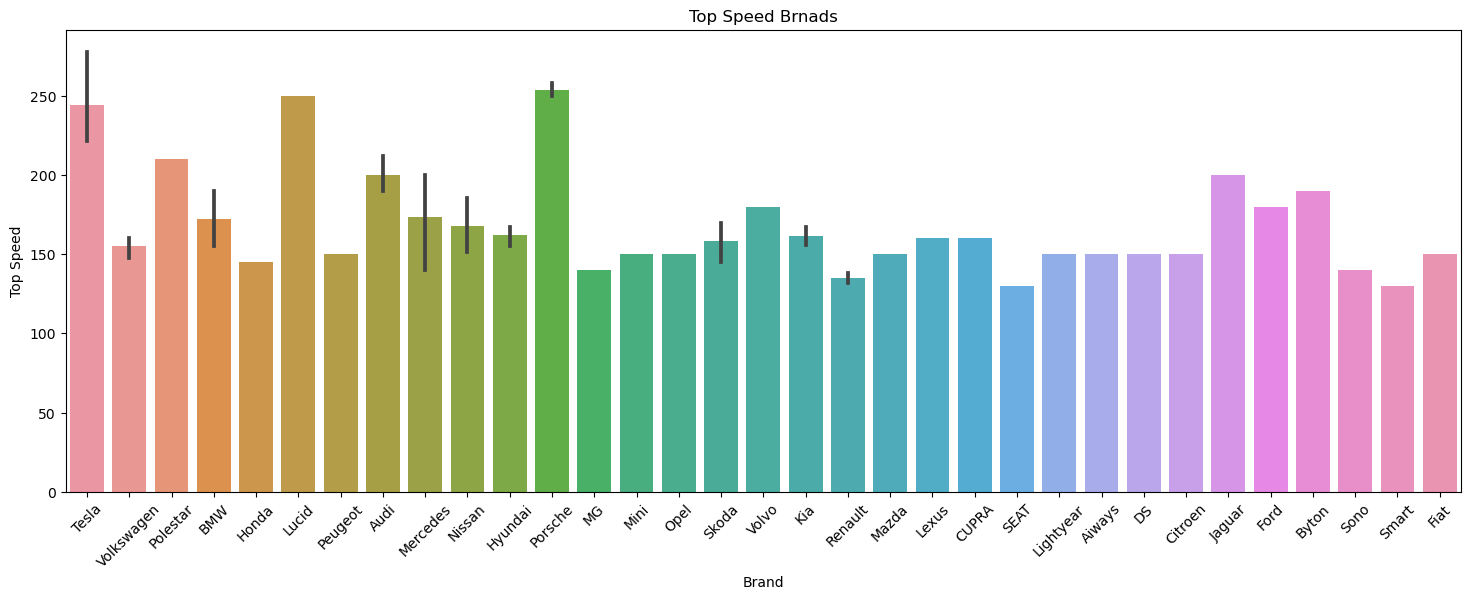

In [19]:
ax=plt.figure(figsize=(18,6))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df)
plt.title('Top Speed Brnads')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Tesla, Lucid and Porsche these brands having highest speed and smart has the lowest.

# Frequency of the Brands in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

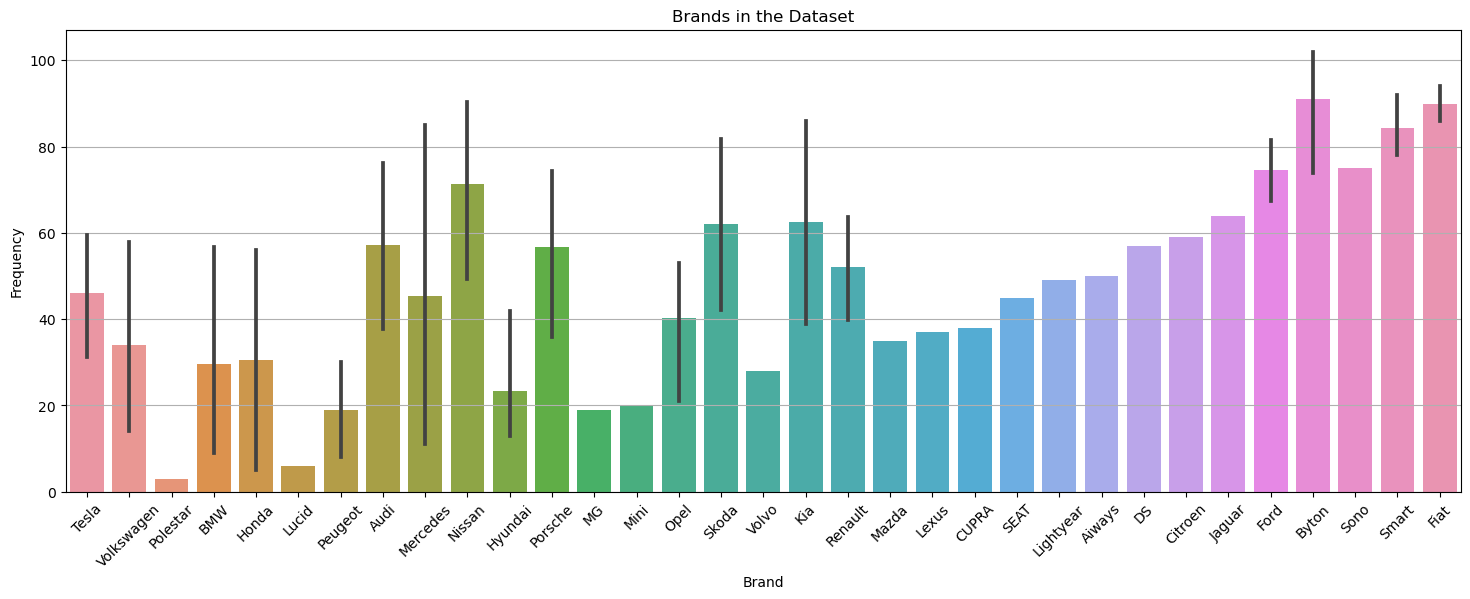

In [20]:
ax=plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Brand',y=a)
plt.grid(axis='y')
plt.title('Brands in the Dataset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton, Smart and Fiat these are the prominent brands and Polestar being the least.

# Car Efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

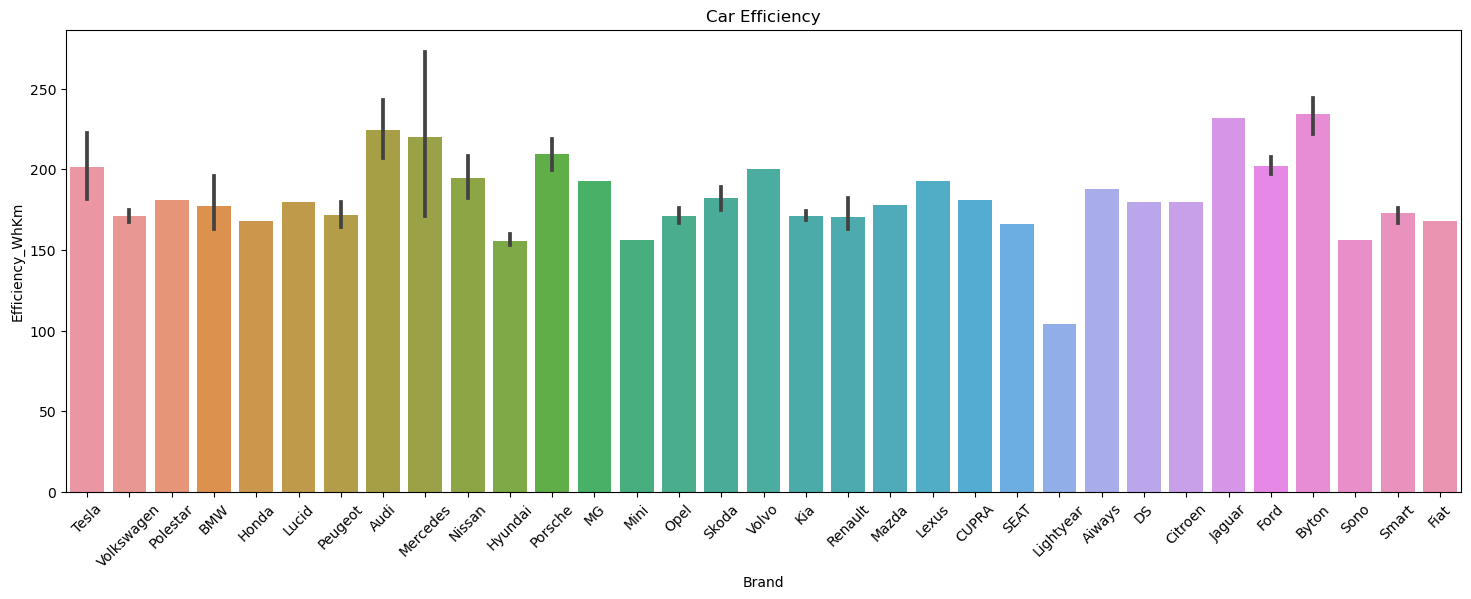

In [21]:
ax=plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Brand',y='Efficiency_WhKm')
plt.title('Car Efficiency')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

Audi, Jaguar and Byton are more efficient and Lightyear is the least

# Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

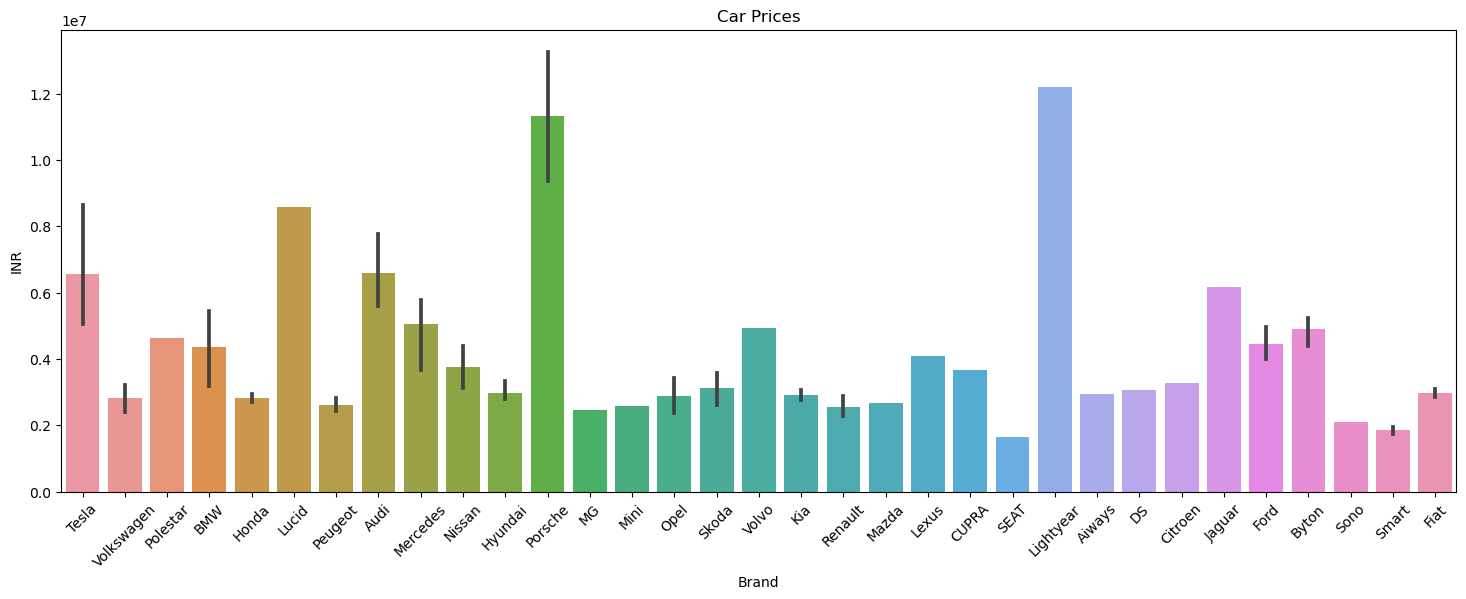

In [22]:
ax=plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Brand',y='INR')
plt.title('Car Prices')
plt.xlabel('Brand')
plt.ylabel('INR')
plt.xticks(rotation=45)

Porsche, Lightyear and Lucid are more expensive and Smart is cheapest.

# Number of seats in each car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

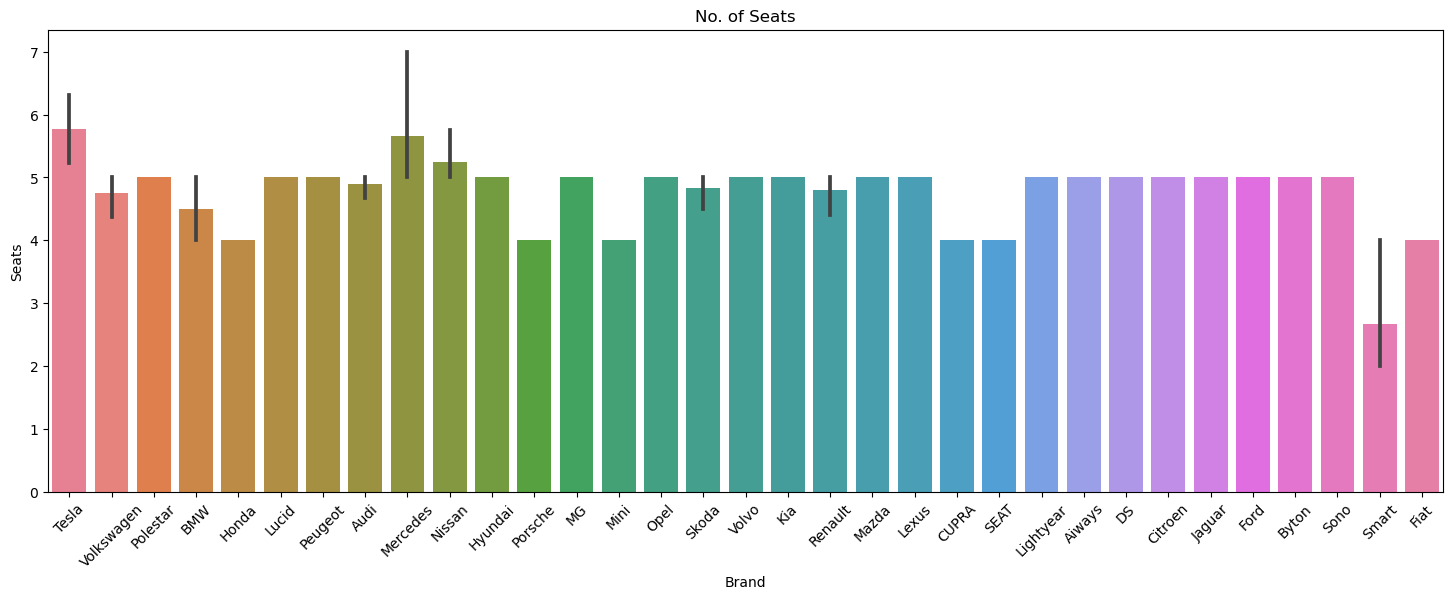

In [23]:
ax=plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Brand',y='Seats',palette='husl')
plt.title('No. of Seats')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart have lowest.

# Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

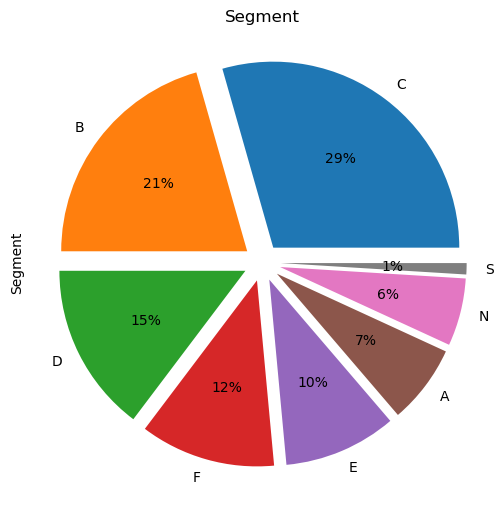

In [24]:
df['Segment'].value_counts().plot.pie(figsize=(6,12),autopct='%.0f%%',
                                   explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title("Segment")

Most Cars are either from the C or B type

# Number of Seats

Text(0.5, 1.0, 'Seats')

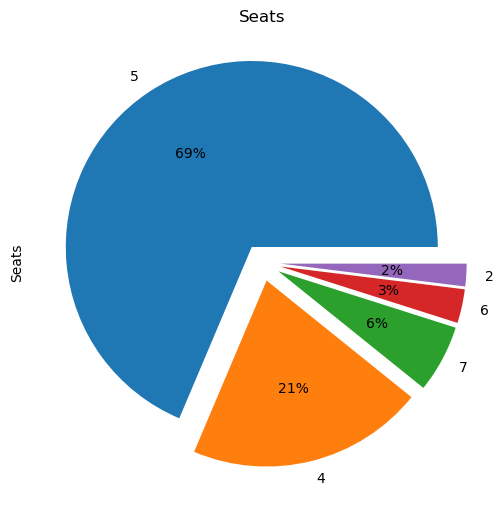

In [25]:
df['Seats'].value_counts().plot.pie(figsize=(6,12),autopct='%.0f%%',
                                   explode=(0.1,0.1,0.1,0.1,0.1))
plt.title("Seats")

Most of the cars have 5 Seats

In [26]:
df.head()

Brand                          Model  Accelsec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0       460              70.0              161             940         Yes   
1       270              45.0              167             250         Yes   
2       400              75.0              181             620         Yes   
3       360              74.0              206             560         Yes   
4       170              28.5              168             190         Yes   

  PowerTrain   Plug Type Body Style Segment  Seats  Price Euro          INR  
0        AWD  Type 2 CCS      Sedan       D      5       55480  4540988.068  
1        RWD  Type 2 CCS  Hatchback       C      5       30000  2455473.000  
2        AWD  Type 2 CCS   Liftback       D      5       56440  4619563.204  
3        RWD  Type 2 CCS        SUV       D      5       68040  5569012.764  
4        RWD  Type 2 CCS  Hatchback       B      4       32997  2700774.753

In [27]:
df3=df[["TopSpeed_KmH","INR"]].groupby("TopSpeed_KmH").count()
df4=df[["Range_Km","INR"]].groupby("Range_Km").count()
df5=df[["Range_Km","TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

In [28]:
df3.head()

INR
TopSpeed_KmH     
123             1
130             7
135             3
140             4
144             1

In [29]:
df4.head()

INR
Range_Km     
95          2
100         1
130         1
160         1
170         2

In [30]:
df3=df3.sort_values("TopSpeed_KmH",ascending=False).head()
df3

INR
TopSpeed_KmH     
410             1
261             2
260             2
250             7
241             1

In [31]:
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

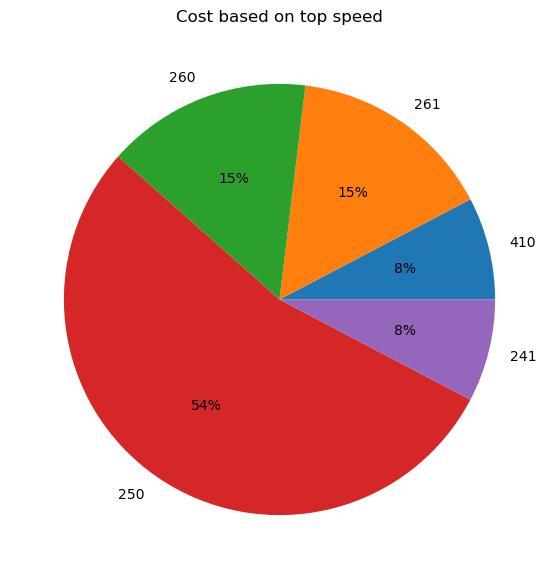

In [32]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["INR"],labels=df3.index,autopct='%1.0f%%')
plt.show()

# Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

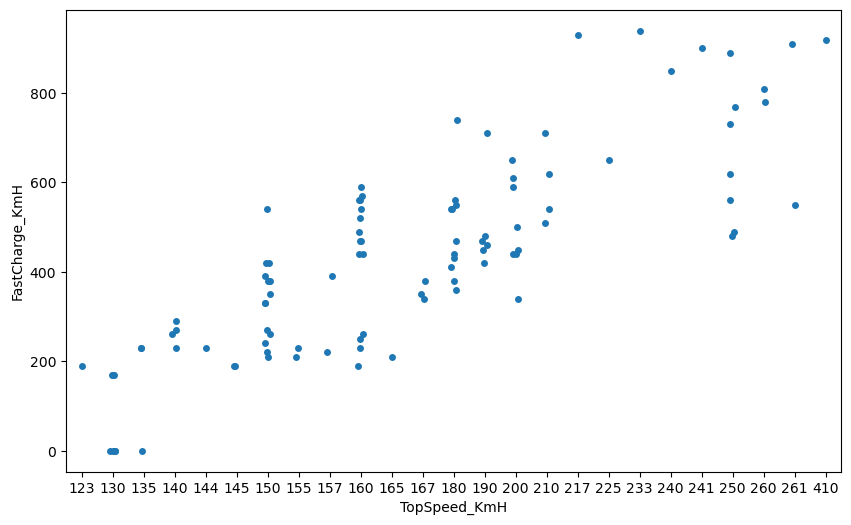

In [33]:
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed_KmH',y='FastCharge_KmH',data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

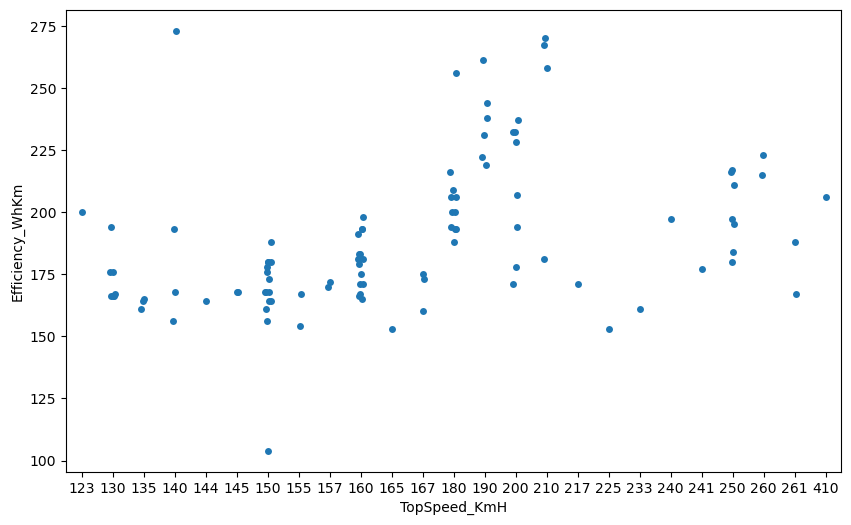

In [34]:
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [35]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0,2,1],inplace=True)

In [36]:
df['RapidCharge'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

In [37]:
from sklearn.preprocessing import StandardScaler
features = ['Accelsec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
c=pca.fit_transform(x)

In [39]:
data2 = pd.DataFrame(c, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0    2.342036  0.254881 -1.297001 -0.569622  0.770965 -1.304321  0.401787   
1   -1.914561 -0.569047 -0.709043  0.593886  0.206999  0.352992 -0.397134   
2    1.515695  0.024369 -0.382073 -0.679665  0.107532 -0.729073  0.266925   
3    0.252431 -0.104398 -0.257001  1.601049 -0.142045  0.190743 -0.412853   
4   -2.561396  0.254023 -0.791450  0.322643 -0.893104  0.348270 -0.495068   
..        ...       ...       ...       ...       ...       ...       ...   
97  -0.305650 -0.460376 -0.075838  0.164252 -0.163668 -0.041783  0.151686   
98   2.231842  0.177451  1.792758  0.158852 -1.120332  0.077190 -0.342025   
99   0.739027 -0.181728  0.277008 -0.811593 -0.287049 -0.448344  0.056445   
100  1.476350 -0.129236  1.151317 -0.179274 -0.719638 -0.118880  0.269224   
101  1.212530 -0.258307  1.390068 -0.094184 -0.482151  0.262949  0.589068   

          PC8       PC9  
0   -0.762618 -0.354884  
1    0.238896 -0.325262  
2    0.042262 -0.087392  
3   -0.301661  0.185571  
4    0.109750 -0.165978  
..        ...       ...  
97  -0.126566  0.132994  
98  -0.091941  0.101495  
99   0.286306 -0.265459  
100  0.310137 -0.101881  
101 -0.206575 -0.367528  

[102 rows x 9 columns]

In [40]:
df_9=data2.iloc[:,:9]
df_9.head(3)

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0  2.342036  0.254881 -1.297001 -0.569622  0.770965 -1.304321  0.401787   
1 -1.914561 -0.569047 -0.709043  0.593886  0.206999  0.352992 -0.397134   
2  1.515695  0.024369 -0.382073 -0.679665  0.107532 -0.729073  0.266925   

        PC8       PC9  
0 -0.762618 -0.354884  
1  0.238896 -0.325262  
2  0.042262 -0.087392

In [41]:
# correlation coefficient between original variables and the component
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
PC1      -0.397320 -0.031950  0.178931 -0.083814  0.350022  0.476277   
PC2       0.405394  0.265108 -0.045449  0.033695  0.161271 -0.122599   
PC3       0.231068 -0.090687  0.746182  0.414735 -0.412281  0.077055   
PC4       0.399331  0.020272 -0.208469  0.176711  0.091676 -0.396197   
Pc5       0.232698 -0.533669 -0.434614 -0.094237 -0.500394  0.395700   
PC6       0.385625  0.017360 -0.154445  0.233263  0.376797  0.317978   
PC7       0.157940 -0.716899  0.222544  0.039317  0.522069 -0.098320   
PC8       0.371545  0.347405  0.073630 -0.054762  0.084277  0.564784   
PC9       0.314783 -0.018007  0.313020 -0.848982 -0.032663 -0.094250   

               PC7       PC8       PC9  
variable                                
PC1       0.041764 -0.479310 -0.470358  
PC2      -0.347157  0.293139 -0.717416  
PC3       0.115080 -0.073804 -0.122423  
PC4       0.036353 -0.773727  0.009225  
Pc5      -0.063030 -0.065794 -0.219099  
PC6       0.696640  0.209205  0.023803  
PC7      -0.309081  0.111116  0.141206  
PC8      -0.459314 -0.127231  0.423796  
PC9       0.259599 -0.060012 -0.029859

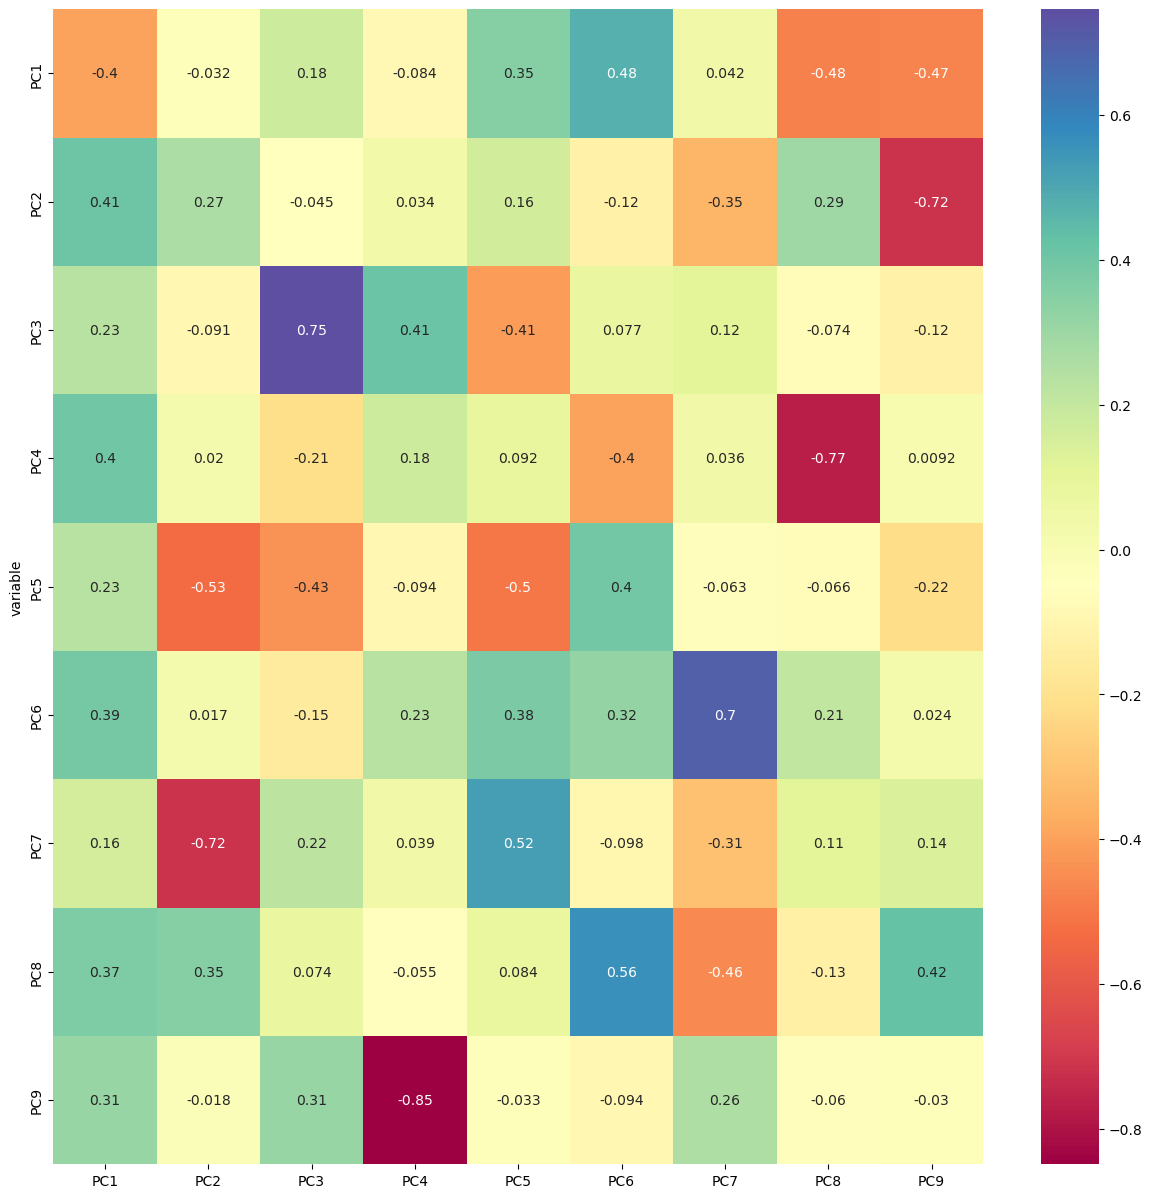

In [42]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (15,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

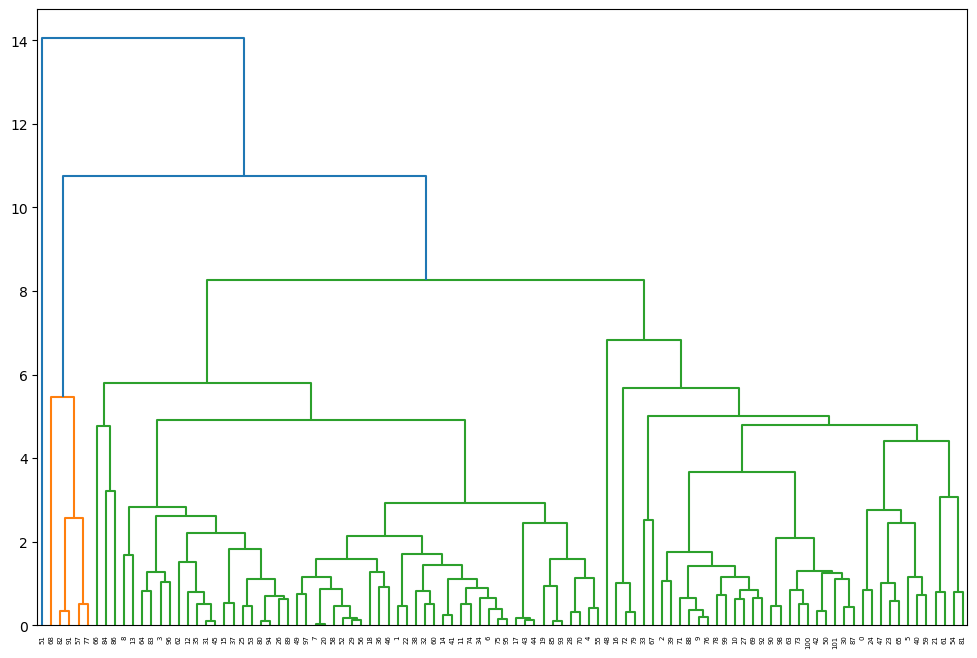

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked=linkage(data2,'complete')
plt.figure(figsize=(12,8))
dendrogram(linked,orientation='top')
plt.show()

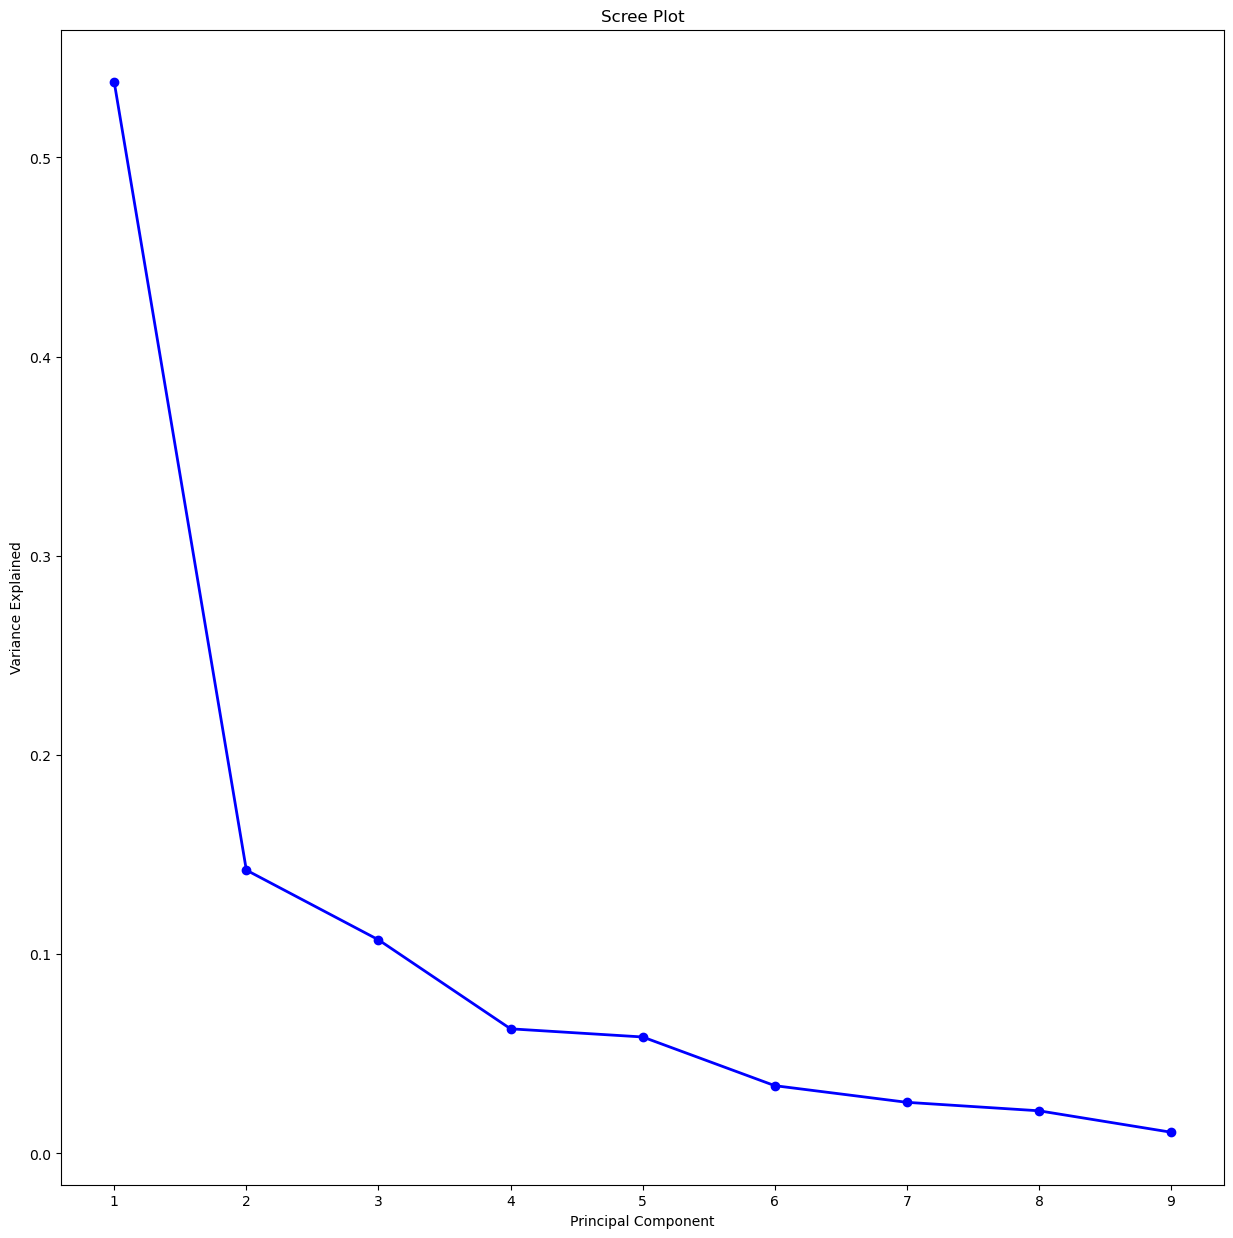

In [44]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(c)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\rutuj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\rutuj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rutuj\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rutuj\anaconda3\Lib\subprocess.py", lin

[1 2 3 2 2 1 2 2 2 3 3 2 2 2 2 2 1 2 2 2 2 3 2 1 1 2 2 3 2 2 3 2 2 3 2 2 2
 2 2 3 1 2 3 2 2 2 2 1 1 2 3 1 2 2 3 2 2 0 2 1 2 3 2 3 2 1 2 3 0 3 2 3 1 3
 2 2 3 0 3 1 2 3 0 2 3 2 3 3 3 2 3 0 3 2 2 2 2 2 3 3 3 3]
350.42727386963327
6
[[-4.96071318e+00  3.00886242e+00  1.84767463e+00  2.33687384e-01
   1.15965673e+00 -5.33637458e-01  6.41036687e-02  5.58254396e-02
   9.24342788e-02]
 [ 3.24705804e+00  1.46672689e+00 -5.80897543e-01 -3.76655298e-01
   2.42409744e-01  1.58476129e-01 -2.04606200e-01 -1.83515359e-01
   6.33103739e-04]
 [-1.17713636e+00 -3.61061710e-01 -4.97293199e-01  1.52024268e-01
  -9.90815172e-02  1.23366178e-01 -4.25958898e-02  1.53024383e-02
  -2.91647221e-02]
 [ 1.53857250e+00 -4.87147645e-01  8.38904255e-01 -1.49374283e-01
  -1.19973613e-01 -2.01792533e-01  1.54651343e-01  4.26746932e-02
   3.68164417e-02]]


In [46]:
#To see each cluster size 
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 13, 2: 54, 3: 30, 0: 5})

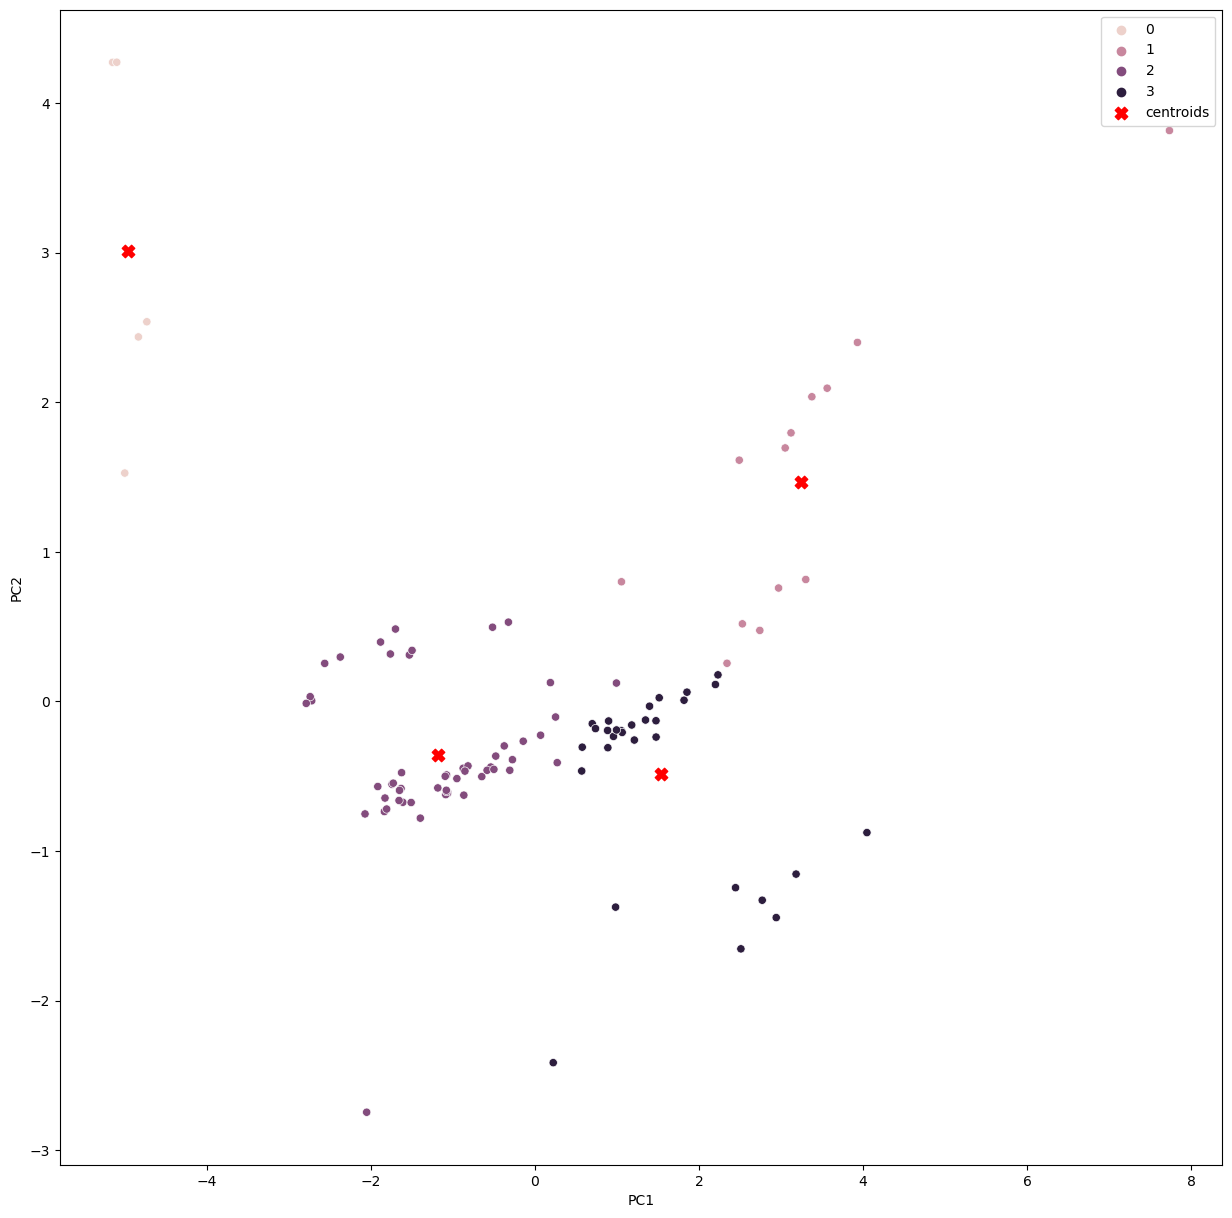

In [47]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()